## Instructions: Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.
1. Aggregate these login counts based on 15-minute time intervals.
2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles.
3. If there are data quality issues, please report them.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import matplotlib.dates as mdates

In [35]:
# Load json file as pandas dataframe
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [36]:
# Show descriptive statistics to get a feel for the data
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


The time data starts at Jan 1, 1970 at 20:12:16 and goes until April 13, 1970 18:57:38

#### 1. Aggregate these login counts based on 15-minute time intervals.

In [37]:
# Set the timestamp column to be the index
logins.set_index('login_time', inplace=True)

# Add a count column to aggregate
logins['count'] = 1

# Resample in 15minute time interval
logins15T = logins.resample('15T').sum()
logins15T.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


#### 2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles.

In [ ]:
# Reset index to get x value
logins15T = logins15T.reset_index()

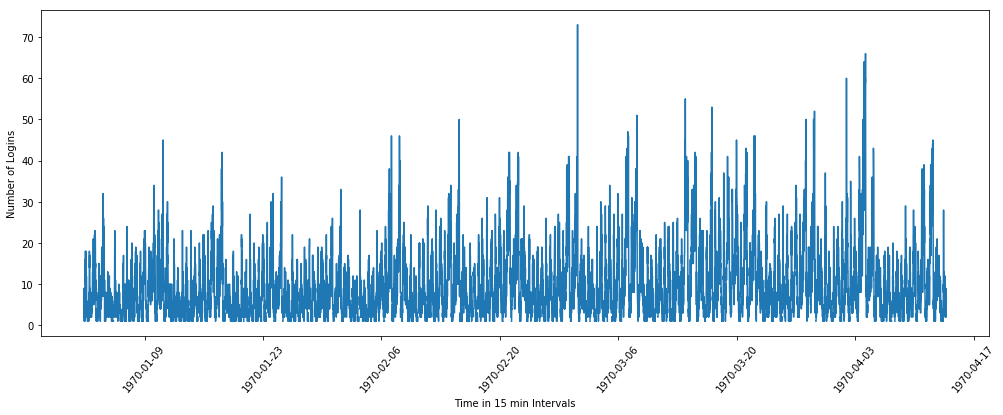

In [41]:
# Plot by 15 minute intervals
x = logins15T['login_time']
y = logins15T['count']
plt.figure(figsize=(17,6))
plt.plot(x, y)
plt.xticks(rotation = 50)
plt.xlabel("Time in 15 min Intervals")
plt.ylabel("Number of Logins")
plt.show()

We can see in the plot above we can see there is a cyclical pattern, possibly having to do with weekends, but we will have to look closer at that to verify.

We can also see the activity is higher in March. The counts are more dense, with the peaks and valleys a bit harder to see. We will plot by the day to see if this is more apparent.

In [72]:
# Look at pattern by week

# 0 = Monday, 6 = Sunday
logins15T['weekday'] = logins15T['login_time'].dt.dayofweek
loginsWeek = logins15T.sort_values(by='count', ascending=False)
weekday = loginsWeek[['count', 'weekday']]
weekday = weekday.groupby('weekday').sum().reset_index()
weekday

,weekday,count
0,0,8823.0
1,1,9268.0
2,2,10339.0
3,3,11960.0
4,4,15208.0
5,5,19377.0
6,6,18167.0


In [73]:
# Replace the weekday numbers with names so it is easier to read
weekday['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
weekday

,weekday,count
0,Mon,8823.0
1,Tues,9268.0
2,Wed,10339.0
3,Thurs,11960.0
4,Fri,15208.0
5,Sat,19377.0
6,Sun,18167.0


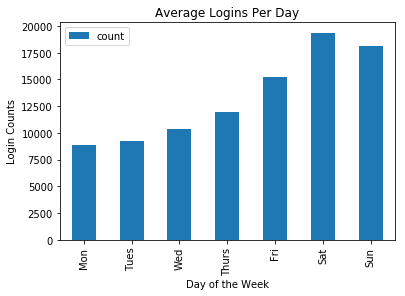

In [74]:
weekday.plot.bar(x= 'weekday', y='count')
plt.xlabel('Day of the Week')
plt.ylabel('Login Counts')
plt.title('Average Logins Per Day')
plt.show()

On average, people login more later in the week and during the weekend.

We should look at the hourly pattern as well. We can see peaks and valleys in the '15 minute' plot above, so it would be interesting to verify if there is a pattern for when people log in during a 24 hour period.

In [77]:
# Counting by the hour
logins15T['hour'] = logins15T['login_time'].dt.hour
loginsHour = logins15T.sort_values(by='count', ascending=False)
loginsHour = loginsHour[['count', 'hour']]
loginsHour = loginsHour.groupby('hour').sum().reset_index()
loginsHour.head()

,hour,count
0,0,5993.0
1,1,6317.0
2,2,5800.0
3,3,4831.0
4,4,5034.0


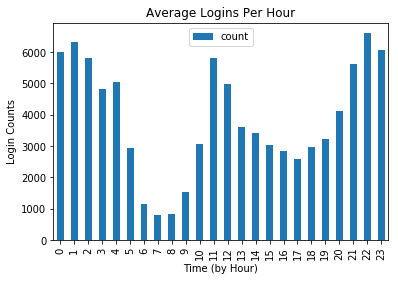

In [76]:
loginsHour.plot.bar(x= 'hour', y='count')
plt.xlabel('Time (by Hour)')
plt.ylabel('Login Counts')
plt.title('Average Logins Per Hour')
plt.show()

We can see a cyclical pattern - people tend to login during lunch and again at night.

In [45]:
# Look again at the data by logins per week to verify if March does have more logins
# Reset index to do further evaluation
logins = logins.reset_index()
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [48]:
# Create a 'date' column
logins['date'] = logins['login_time'].apply(lambda a: dt.date(a.year, a.month, a.day))
logins.head()

,login_time,count,date
0,1970-01-01 20:13:18,1,1970-01-01
1,1970-01-01 20:16:10,1,1970-01-01
2,1970-01-01 20:16:37,1,1970-01-01
3,1970-01-01 20:16:36,1,1970-01-01
4,1970-01-01 20:26:21,1,1970-01-01


In [53]:
loginsDay = logins['date'].value_counts().sort_index()
loginsDay = loginsDay.reset_index()
loginsDay.rename(columns={'index': 'login_date', 'date': 'count'},inplace=True)
loginsDay.head()

,login_date,count
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


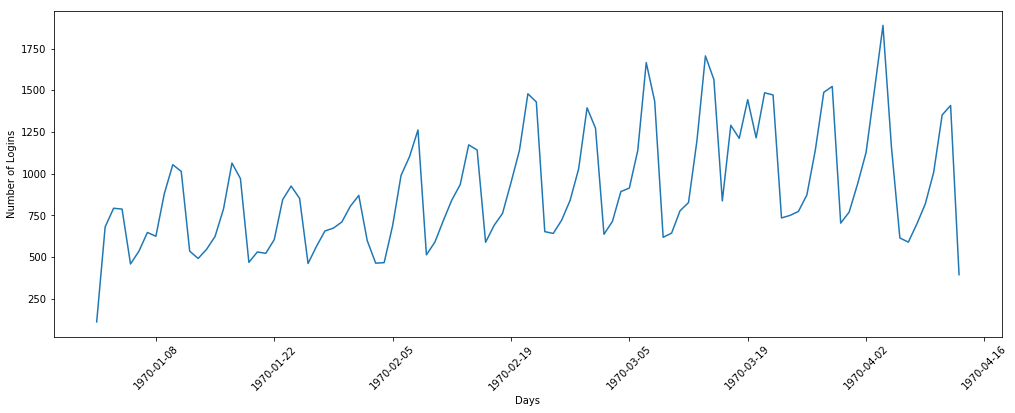

In [68]:
# Plot by day intervals
x = loginsDay['login_date']
y = loginsDay['count']
plt.figure(figsize=(17,6))
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.xlabel("Days")
plt.ylabel("Number of Logins")
plt.show()

In [61]:
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

[ 719170.  719184.  719198.  719212.  719226.  719240.  719254.  719268.]
<a list of 8 Text xticklabel objects>


Here we can see a bit easier that the general number of logins increases over the three-month period, with the highest being in March.

#### 3. If there are data quality issues, please report them.

I did not notice any data quality issues as I ran through my analysis.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the
observation

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Answers

1. I would track how many drivers are taking advantage of the reimbursement program (how many drive in both cities), and how often they are using it. I would also watch to see if wait times for customers and customer satisfaction changes at all. If the purpose of the program is to make more drivers available, we would expect wait times to go down. I would track the number of drivers taking advantage of the program to understand if the toll is really the cause of drivers being exclusive to one city, or if it may be because of distance from their house, or time of day they want to work.

2. 
 a. Before implementing the reimbursement program, I would track how many drivers drive in both cities, what the average wait times are for customers, and customer satisfaction. The time period would be marked as 'Before'. Then after implementing the program, the time period would be marked as 'After'. We could look at different amounts of time to compare effectiveness of the program, one week, one month, three months, etc.
 
 b. We could use a ztest to compare the before and after metrics with a p-value of .05. Generally the z-statistic is used if the sample size is over 30 and you know the population standard deviation.
 
 c. I would show the differences in the metrics we were following during the before and after time periods. Assuming the amount of drivers that drive in both cities goes up, I would suggest to continue the program, but to continue tracking the effectiveness, including drivers in both cities, wait times and customer satisfaction. Caveats may be that the 'After' time period may show general increase in popularity of the service, or there may have been a bump because of a new program, and then drivers will revert to their own city because of convenience.

## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

### Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [147]:
# Load json file as pandas dataframe
import json

with open('ultimate_data_challenge.json') as d:
    data = json.load(d)

ultData = pd.DataFrame(data)
ultData.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [110]:
ultData.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [111]:
ultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [148]:
# Change dates to datetime
ultData['last_trip_date'] = pd.to_datetime(ultData['last_trip_date'])
ultData['signup_date'] = pd.to_datetime(ultData['signup_date'])

#### Determine Active Users

In [113]:
# Find out what the last date from the data is.
ultData['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [149]:
# Since July 1, 2014 was the last day, users will be labelled as'active' if they took a trip from June 1 - July 1
ultData['active'] = 'na'
ultData.loc[ultData['last_trip_date'] >= "2014-06-01", "active"] = 1
ultData.loc[ultData['last_trip_date'] < "2014-06-01", "active"] = 0
ultData.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [150]:
# Make sure all were converted. We also see the data type needs to be converted to a number to help with analysis
ultData['active'].unique()

array([1, 0], dtype=object)

In [151]:
ultData['active'] = pd.to_numeric(ultData['active'])

In [152]:
# Recheck all data types look ok
ultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [153]:
# Users retained
ultData['active'].value_counts()

0    31196
1    18804
Name: active, dtype: int64

In [154]:
ultData['active'].value_counts()/(ultData['active'].notnull().sum())

0    0.62392
1    0.37608
Name: active, dtype: float64

In [155]:
active_users = ultData[ultData['active']==1]
nonactive_users = ultData[ultData['active']==0]

In [156]:
# Fill in na's for the purpose of exploratory analysis
active_users['avg_rating_by_driver'].fillna(active_users['avg_rating_by_driver'].mean(), inplace=True)
active_users['avg_rating_of_driver'].fillna(active_users['avg_rating_of_driver'].mean(), inplace=True)

nonactive_users['avg_rating_by_driver'].fillna(nonactive_users['avg_rating_by_driver'].mean(), inplace=True)
nonactive_users['avg_rating_of_driver'].fillna(nonactive_users['avg_rating_of_driver'].mean(), inplace=True)

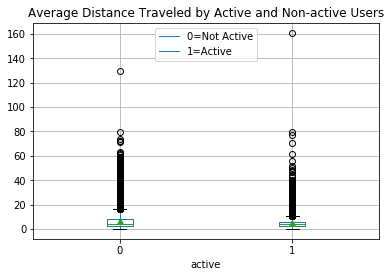

In [157]:
#Boxplot showing the average distance travelled by active and nonactive users
ultData.boxplot(column='avg_dist', by='active', showmeans=True)
plt.legend(('0=Not Active', '1=Active'), loc='upper center')
plt.title('Average Distance Traveled by Active and Non-active Users')

plt.suptitle("")

plt.show()

The average distances traveled between the Active and Non-Active groups looks pretty close. Active users may have more short rides, but that would have to be verified through statistical inference. Each group has some larger distances, but those look fairly rare.

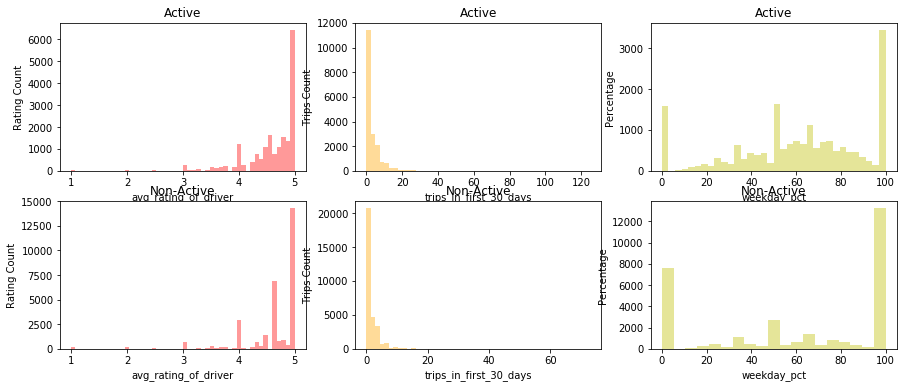

In [158]:
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(nrows = 2, ncols=3, figsize=(15, 6))

##Active
# Average Rating of Driver
sns.distplot(active_users['avg_rating_of_driver'], kde=False, color="r", ax=axes[0,0]).set_title('Active')
axes[0,0].set_ylabel('Rating Count')

# Trips in the First 30 Days
sns.distplot(active_users['trips_in_first_30_days'], kde=False, color="orange", ax=axes[0,1]).set_title('Active')
axes[0,1].set_ylabel('Trips Count')

# Percent of Trips During the Weekday
sns.distplot(active_users['weekday_pct'], kde=False, color="y", ax=axes[0,2]).set_title('Active')
axes[0,2].set_ylabel('Percentage')

##Non-Active
# Average Rating of Driver
sns.distplot(nonactive_users['avg_rating_of_driver'], kde=False, color="r", ax=axes[1,0]).set_title('Non-Active')
axes[1,0].set_ylabel('Rating Count')

# Trips in the First 30 Days
sns.distplot(nonactive_users['trips_in_first_30_days'], kde=False, color="orange", ax=axes[1,1]).set_title('Non-Active')
axes[1,1].set_ylabel('Trips Count')

# Percent of Trips During the Weekday
sns.distplot(nonactive_users['weekday_pct'], kde=False, color="y", ax=axes[1,2]).set_title('Non-Active')
axes[1,2].set_ylabel('Percentage')

plt.show()

We can see the Non-Active customers had somewhat lower driver ratings, showing they were not as happy with their experience. The trips_in_the_first_30_days and weekday_pct seemed pretty similar between the groups.

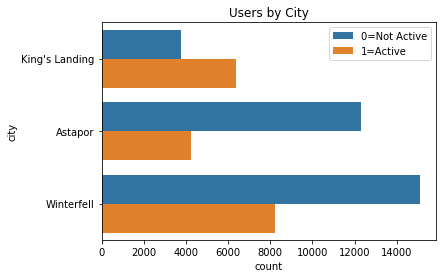

In [159]:
sns.countplot(y="city", hue='active', data=ultData).set_title('Users by City')
plt.legend(('0=Not Active', '1=Active'), loc='upper right')
plt.show()

Overall there are more users in Winterfell and Astapor. These locations have more inactive users than active users. King's Landing is the opposite, it has more active users than inactive.

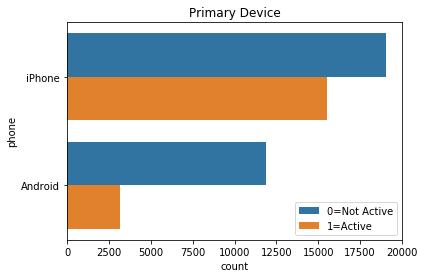

In [160]:
sns.countplot(y="phone", hue='active', data=ultData).set_title('Primary Device')
plt.legend(('0=Not Active', '1=Active'), loc='lower right')
plt.show()

The percentage of active users for Androids looks much lower than iPhones. I would want to look into the apps for each. It's likely that people are frustrated with the Android app and use the service less because of that.

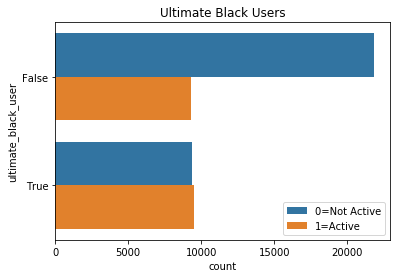

In [161]:
sns.countplot(y="ultimate_black_user", hue='active', data=ultData).set_title('Ultimate Black Users')
plt.legend(('0=Not Active', '1=Active'), loc='lower right')
plt.show()

Ultimate Black users are more likely to be active than non-Ultimate Black users.

#### Build Predictive Model

In [142]:
ultData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [167]:
# Drop null values in the numerical columns, but change null values to 'unknown' in phone (categorical)
ultDataDrop = ultData[~(ultData['avg_rating_by_driver'].isnull() | ultData['avg_rating_of_driver'].isnull())]

ultDataDrop.phone.replace(np.NaN, 'unknown', inplace=True)
ultDataDrop.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [165]:
ultDataDrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
city                      41744 non-null object
last_trip_date            41744 non-null datetime64[ns]
phone                     41744 non-null object
signup_date               41744 non-null datetime64[ns]
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
ultimate_black_user       41744 non-null bool
weekday_pct               41744 non-null float64
active                    41744 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


In [166]:
# Count the number of unique values in each column
ultData.apply(lambda x: len(x.unique()))

avg_dist                  2908
avg_rating_by_driver        28
avg_rating_of_driver        38
avg_surge                  115
city                         3
last_trip_date             182
phone                        3
signup_date                 31
surge_pct                  367
trips_in_first_30_days      59
ultimate_black_user          2
weekday_pct                666
active                       2
dtype: int64

In [169]:
# Change categorical to 0 and 1 instead of False/True.
ultDataDrop[['ultimate_black_user']] = ultDataDrop[['ultimate_black_user']].astype(str)
ultDataDrop.ultimate_black_user.replace(('True', 'False'), (1, 0), inplace=True)
ultDataDrop.head()

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [172]:
ultDataDrop.drop(['last_trip_date','signup_date'],axis=1, inplace = True)

In [171]:
# Make multi-category columns separate columns of 0 and 1 for dataset
ultDataDrop = pd.get_dummies(ultDataDrop,columns=['city','phone'])
ultDataDrop.shape

(41744, 17)

In [174]:
# Drop the target variable
ultDataDropNew = ultDataDrop.drop(['active'],axis=1)

In [175]:
# Split into features and target
y = ultDataDrop['active']
x_cols = ultDataDropNew.columns[1:]
X = ultDataDrop[x_cols]

In [178]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=10)

# Create the classifier lr
lr = LogisticRegression()

# Fit the classifier to the training data
lr.fit(X_train,y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8002 1837]
 [3109 3750]]
             precision    recall  f1-score   support

          0       0.72      0.81      0.76      9839
          1       0.67      0.55      0.60      6859

avg / total       0.70      0.70      0.70     16698



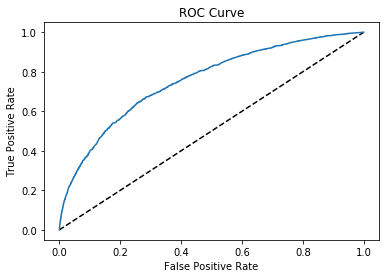

In [180]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities
y_predProb = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predProb)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The model isn't doing great so far. We will try tuning the hyperparameters, but it may be due to an imbalance in the dataset - there are fewer Active users than Non-Active.

In [185]:
# Setup hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate logistic regression classifier
lr = LogisticRegression()

# Instantiate the GridSearchCV object
lr_cv = GridSearchCV(lr, param_grid, cv=5)

# Fit to the data
lr_cv.fit(X,y)

# Print tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0061054022965853268}
Best score is 0.703166922192


In [191]:
# Rerun with best C
# Create the classifier lr
lrC = LogisticRegression(C=.0061054022965853268)

# Fit the classifier to the training data
lrC.fit(X_train,y_train)

# Predict on the test set
y_predC = lrC.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_predC))
print(classification_report(y_test, y_predC))

[[8146 1693]
 [3211 3648]]
             precision    recall  f1-score   support

          0       0.72      0.83      0.77      9839
          1       0.68      0.53      0.60      6859

avg / total       0.70      0.71      0.70     16698



The tuned logistic regression model didn't do much better. My guess is that it is because of the imbalanced dataset.

In [186]:
# Feature Importance
lr.fit(X_train / np.std(X_train, 0), y_train)

features = pd.DataFrame(lr.coef_)

features = pd.DataFrame(features.unstack())

features.columns = ['value']

features.reset_index(level=1,drop=True,inplace=True)

In [187]:
featurenames = pd.DataFrame(list(ultDataDropNew))
featurenames.columns = ['feature']
importance = pd.merge(featurenames, features, left_index=True, right_index=True)
print(importance.head())

                feature     value
0              avg_dist -0.113759
1  avg_rating_by_driver -0.034806
2  avg_rating_of_driver -0.039190
3             avg_surge  0.089595
4             surge_pct  0.458786


In [189]:
importance['absvalue'] = importance['value'].abs()

importanceSorted = importance.sort_values(by='absvalue',ascending=False)
print(importanceSorted.head(10))

                   feature     value  absvalue
8             city_Astapor  0.501633  0.501633
4                surge_pct  0.458786  0.458786
5   trips_in_first_30_days  0.421177  0.421177
11           phone_Android  0.380101  0.380101
7              weekday_pct -0.203828  0.203828
10         city_Winterfell -0.114826  0.114826
0                 avg_dist -0.113759  0.113759
3                avg_surge  0.089595  0.089595
2     avg_rating_of_driver -0.039190  0.039190
1     avg_rating_by_driver -0.034806  0.034806


The features above show the top ten most important features.

The logistic regression model above (not tuned) had better precision and recall for the Non-Active group, .72 and .81 respectively, than the Active group, .67 and .55 respectively.

                precision    recall  f1-score   support

          0       0.72      0.81      0.76      9839
          1       0.67      0.55      0.60      6859
As discussed above, this is most likely because of the imbalanced dataset. I would use oversampling or undersampling to see if we could improve the model. I would also use the most important features in a new model to see if that removes some of the noise from our model.

#### Conclusion

I discussed a few ways to improve the model above. Once the model is improved, Ultimate could focus on the most important features to improve rider retention. For example, we saw in the exploratory analysis that the phone type seemed to make a difference. Phone is also showing up as an important feature in the model, so I would focus on how to improve the app for Android users. Astapor also seems to be significant for the model, so I would focus on what is different in that city than the others, why would those users be less active?